In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv("toxicity.csv")
data.head()

,toxicity,logKow,pKa,ELUMO,Ecarb,Emet,RM,IR,Ts,P
0,-0.15,1.68,1.00,4.81,17.8635,1.4838,31.36,1.425,31.3,12.43
1,-0.33,0.94,0.98,4.68,16.9491,0.0000,22.10,1.408,30.4,8.76
2,-0.34,1.16,0.96,4.86,17.1806,0.2778,26.73,1.418,30.9,10.59
3,0.03,2.75,1.00,4.83,18.4794,3.5836,40.63,1.435,31.8,16.10
4,-0.57,0.79,0.97,4.80,16.8022,1.0232,22.14,1.411,32.5,8.77


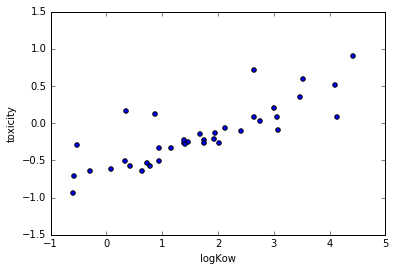

In [67]:
# exploratory analysis: plot toxicity vs. logKow
plt.scatter(data["logKow"],data["toxicity"])
plt.xlabel("logKow")
plt.ylabel("toxicity")

In [30]:
# randomly split the dataset into a training and test set
# (note: you will be given a separate test set in Kaggle, but 
# this might be useful to keep a separate validation set 
# for model selection purposes)
train, test = train_test_split(data, train_size=.7)
ytrain = train["toxicity"]
Xtrain = train.drop("toxicity", axis=1)
ytest = test["toxicity"]
Xtest = test.drop("toxicity", axis=1)

In [38]:
clf = LinearRegression()
# fit the model using the training set
clf.fit(Xtrain, ytrain)
# get the mean squared error for 5 fold cross validation
# note that sklearn flips the sign for MSE so that greater is better
print cross_val_score(clf, Xtrain, ytrain, cv=5, scoring="mean_squared_error")

[-0.22688162 -0.05394596 -0.06781445 -0.03159319 -0.71958351]


In [55]:
# use the model to predict the y values for the test set
ypred = clf.predict(Xtest)
print mean_squared_error(ypred, ytest)

0.0780699014988


In [50]:
# output the predictions to a csv to submit to Kaggle
np.savetxt("preds.csv", ypred, header="predictions")